In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from collections import Counter

In [2]:
ROOT_FOLDER = '../../../'

In [3]:
DATA_FOLDER = '../../../data/'

In [4]:
IMAGE_FOLDER = f'{ROOT_FOLDER}articles/img/'

In [5]:
ml_term_classification_df = pd.read_csv(f'{ROOT_FOLDER}ml_term_classification.csv')

In [6]:
ml_term_classification_df

,ml_term,classification,ml_model_category,ml_method_category
0,Linear Regression,ML Model,Regression Model,NaN
1,Polynomial Regression,ML Model,Regression Model,NaN
2,Ridge Regression,ML Model,Regression Model,NaN
3,Lasso Regression,ML Model,Regression Model,NaN
4,Elastic Net Regression,ML Model,Regression Model,NaN
...,...,...,...,...
90,DALL-E,ML Model,Generative Model,NaN
91,Stable Diffusion,ML Model,Generative Model,NaN
92,Q-Learning,ML Method,NaN,Reinforcement Learning
93,Deep Q-Networks,ML Model,Reinforcement Learning Model,NaN


In [7]:
large_ml_lncRNA_search_df = pd.read_parquet(f'{DATA_FOLDER}large_ml_lncRNA_search_df.parquet')

In [8]:
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.dropna()
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.query('language == "en"')
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df[['title', 'year']]

In [9]:
large_ml_lncRNA_search_df

,title,year
12,LncMachine: a machine learning algorithm for l...,2021
29,DMFLDA: a deep learning framework for predicti...,2020
48,Evaluation of deep learning in non-coding RNA ...,2019
58,A review of machine learning-based prediction ...,2023
89,LncRNA Subcellular Localization Signals–Are th...,2023
...,...,...
913,Mitochondrial Import of Malat1 Regulates Cardi...,2020
917,Impact of sequencing technologies on long non-...,2022
921,Deciphering the methylation landscape in breas...,2021
928,Machine learning models for predicting lymph n...,2020


In [10]:
meta_df = large_ml_lncRNA_search_df

In [11]:
ml_results_df = pd.read_parquet(f'{DATA_FOLDER}ml_lncRNA_search_result_df.parquet')

In [12]:
total_no_papers = ml_results_df['title'].nunique()

In [13]:
total_no_papers

76

In [14]:
ml_results_df

,title,ml_term,cnt
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1
...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1


In [15]:
# Merge ML results with publication years
ml_trend_df = ml_results_df.merge(meta_df, on="title")

In [16]:
ml_trend_df

,title,ml_term,cnt,year
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021
...,...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,2017


In [17]:
ml_trend_df['ml_term'].value_counts()

ml_term
SUPPORT_VECTOR_MACHINES                                    60
RANDOM_FORESTS                                             56
NEURAL_NETWORKS                                            44
LOGISTIC_REGRESSION                                        30
DECISION_TREES                                             27
RECURRENT_NEURAL_NETWORKS                                  23
PRINCIPAL_COMPONENT_ANALYSIS                               19
GRADIENT_BOOSTING                                          18
BOOSTING                                                   16
XGBOOST                                                    15
AUTOENCODERS                                               14
CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING                     12
LONG_SHORT-TERM_MEMORY                                     12
GRAPH_NEURAL_NETWORKS                                      11
STACKING                                                   11
GRAPH_CONVOLUTIONAL_NETWORKS                               10


In [18]:
ml_trend_df[['year', 'ml_term']].value_counts()

year  ml_term                  
2024  SUPPORT_VECTOR_MACHINES      14
      RANDOM_FORESTS               14
2021  SUPPORT_VECTOR_MACHINES      13
      RANDOM_FORESTS               12
2023  RANDOM_FORESTS               12
                                   ..
2024  LLAMA                         1
      MULTI_LAYER_PERCEPTRON        1
      HIDDEN_MARKOV_MODELS          1
      RESNET                        1
      RECURRENT_NEURAL_NETWORKS     1
Name: count, Length: 188, dtype: int64

In [19]:
# Count the number of papers using each machine learning term
ml_term_counts = ml_results_df['ml_term'].value_counts()

# Convert to a DataFrame for better presentation
ml_term_counts_df = ml_term_counts.reset_index()
ml_term_counts_df.columns = ['ml_term', 'paper_count']

In [20]:
ml_term_counts_df

,ml_term,paper_count
0,SUPPORT_VECTOR_MACHINES,60
1,RANDOM_FORESTS,56
2,NEURAL_NETWORKS,44
3,LOGISTIC_REGRESSION,30
4,DECISION_TREES,27
5,RECURRENT_NEURAL_NETWORKS,23
6,PRINCIPAL_COMPONENT_ANALYSIS,19
7,GRADIENT_BOOSTING,18
8,BOOSTING,16
9,XGBOOST,15


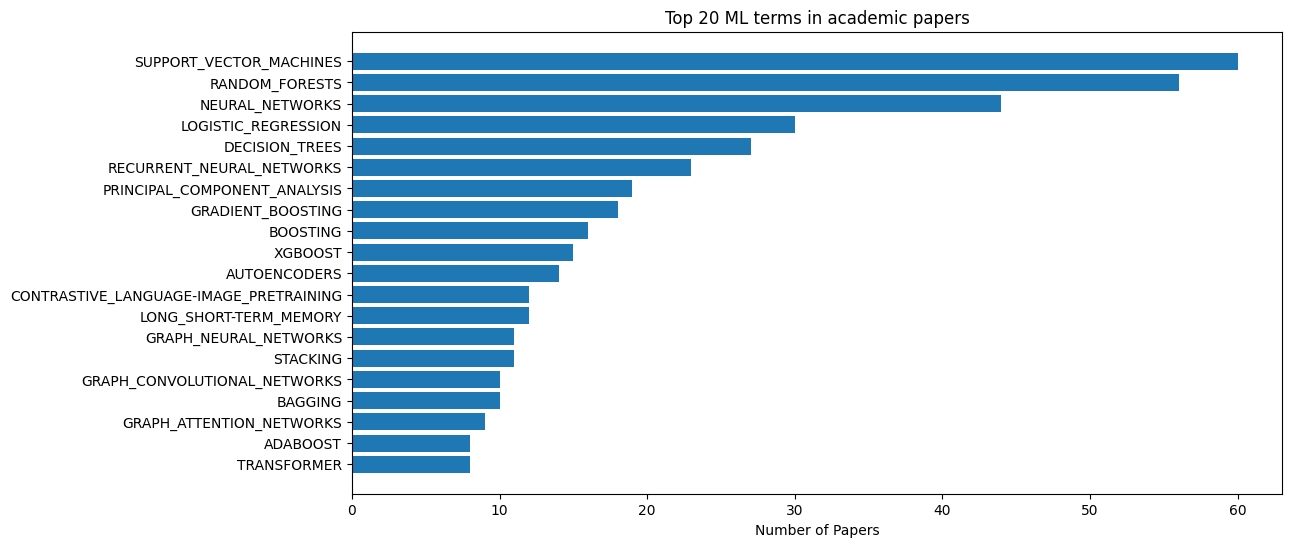

In [21]:
import matplotlib.pyplot as plt

# Select the top 20 ML terms
top_20_ml_terms = ml_term_counts_df.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_ml_terms['ml_term'], top_20_ml_terms['paper_count'])
plt.xlabel("Number of Papers")
# plt.ylabel("ML Term")
plt.title("Top 20 ML terms in academic papers")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Add percentage of papers using the term

In [22]:
ml_term_counts_df['paper_pct'] = (ml_term_counts_df['paper_count'] / total_no_papers) * 100

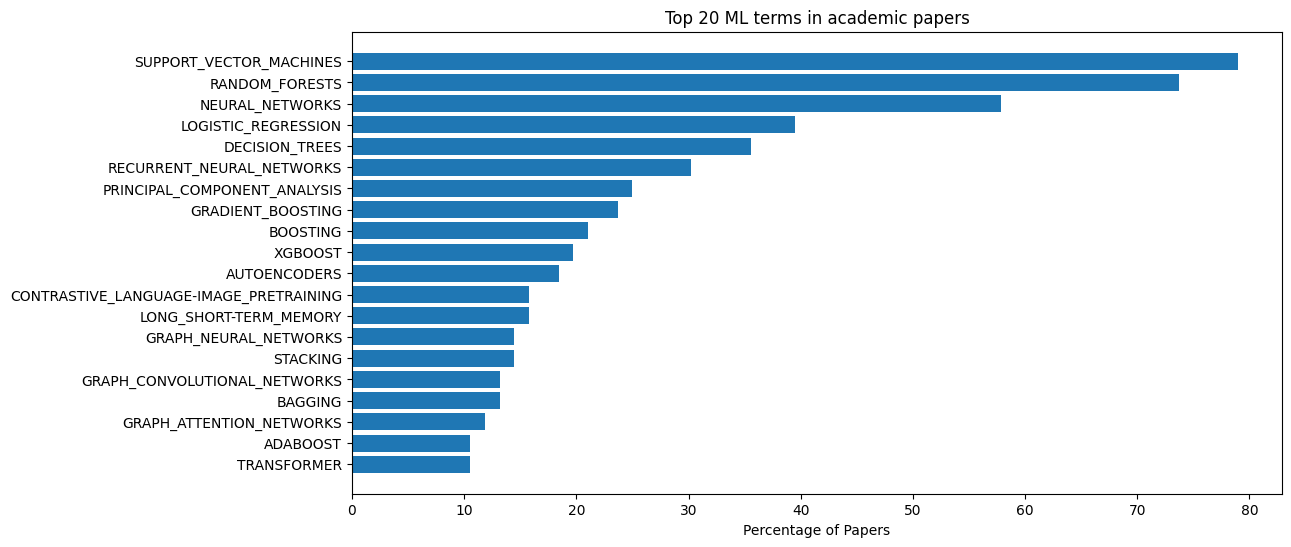

In [23]:
import matplotlib.pyplot as plt

# Select the top 20 ML terms
top_20_ml_terms = ml_term_counts_df.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_ml_terms['ml_term'], top_20_ml_terms['paper_pct'])
plt.xlabel("Percentage of Papers")
# plt.ylabel("ML Term")
plt.title("Top 20 ML terms in academic papers")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_methods.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()

In [24]:
ml_term_counts_df

,ml_term,paper_count,paper_pct
0,SUPPORT_VECTOR_MACHINES,60,78.947368
1,RANDOM_FORESTS,56,73.684211
2,NEURAL_NETWORKS,44,57.894737
3,LOGISTIC_REGRESSION,30,39.473684
4,DECISION_TREES,27,35.526316
5,RECURRENT_NEURAL_NETWORKS,23,30.263158
6,PRINCIPAL_COMPONENT_ANALYSIS,19,25.000000
7,GRADIENT_BOOSTING,18,23.684211
8,BOOSTING,16,21.052632
9,XGBOOST,15,19.736842


Trend Analysis

In [25]:
# Aggregate counts per year
ml_trend_over_time_df = ml_trend_df[['year', 'ml_term']].value_counts().reset_index()

In [26]:
ml_trend_over_time_df

,year,ml_term,count
0,2024,SUPPORT_VECTOR_MACHINES,14
1,2024,RANDOM_FORESTS,14
2,2021,SUPPORT_VECTOR_MACHINES,13
3,2021,RANDOM_FORESTS,12
4,2023,RANDOM_FORESTS,12
...,...,...,...
183,2024,LLAMA,1
184,2024,MULTI_LAYER_PERCEPTRON,1
185,2024,HIDDEN_MARKOV_MODELS,1
186,2024,RESNET,1


In [27]:
# Pivot for visualization
#ml_trend_pivot_df = ml_trend_over_time_df.pivot(index="year", columns="ml_term", values="count").fillna(0).reset_index()
ml_trend_pivot_df = ml_trend_over_time_df.pivot(index="year", columns="ml_term", values="count").fillna(0)

In [28]:
ml_trend_pivot_df

ml_term,ADABOOST,AUTOENCODERS,BAGGING,BAYESIAN_NETWORKS,BIDIRECTIONAL_ENCODER_REPRESENTATIONS_FROM_TRANSFORMERS,BIDIRECTIONAL_GATED_RECURRENT_UNIT,BIDIRECTIONAL_RNNS,BLENDING,BOOSTING,CATBOOST,...,RESNET,RIDGE_REGRESSION,SPECTRAL_CLUSTERING,STACKING,SUPPORT_VECTOR_MACHINES,SUPPORT_VECTOR_REGRESSION,TRANSFORMER,UNIFORM_MANIFOLD_APPROXIMATION_AND_PROJECTION,VARIATIONAL_AUTOENCODERS,XGBOOST
year,,,,,,,,,,,,,,,,,,,,,
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0
2020,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.0
2021,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,0.0,1.0,2.0,13.0,1.0,1.0,1.0,0.0,6.0
2022,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,7.0,0.0,2.0,0.0,0.0,2.0
2023,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,10.0,0.0,2.0,0.0,2.0,2.0
2024,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,3.0,0.0,2.0,14.0,0.0,3.0,0.0,0.0,5.0


In [29]:
# Calculate total value for each ML term
column_totals = ml_trend_pivot_df.iloc[:, 1:].sum().sort_values(ascending=False)

# Reorder columns based on the total value
# ml_trend_pivot_df = ml_trend_pivot_df[['year'] + list(column_totals.index)]
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [30]:
ml_trend_pivot_20_df = ml_trend_pivot_df[ml_trend_pivot_df.columns[:20]]

<Figure size 1200x600 with 0 Axes>

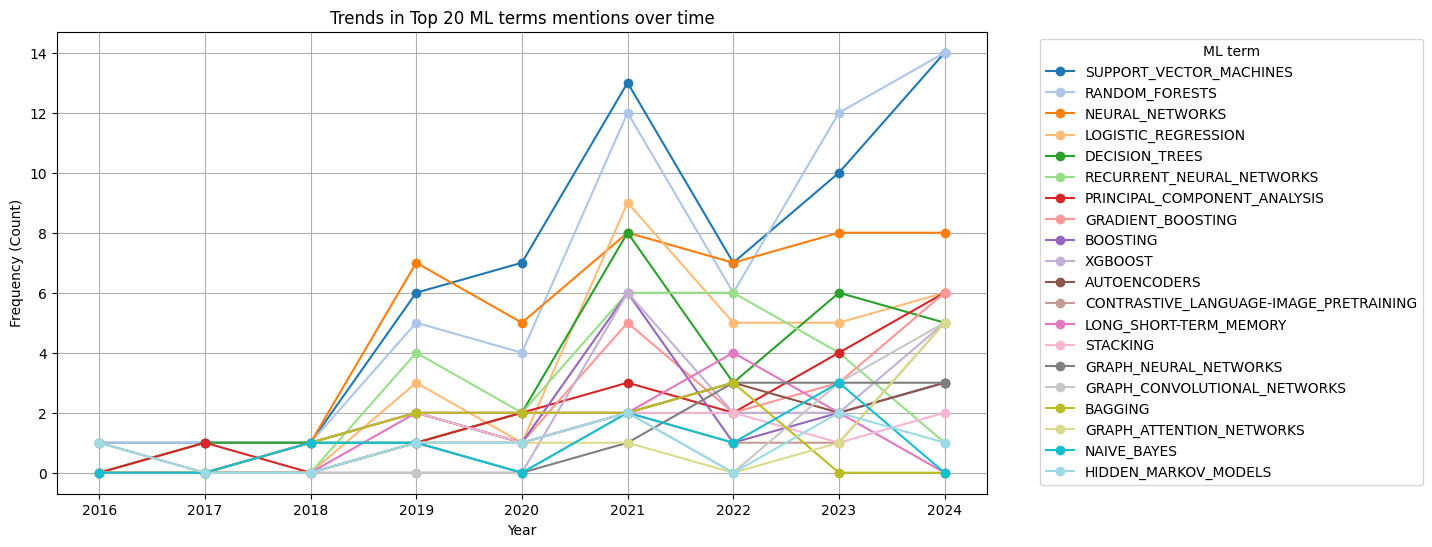

In [31]:
# Define colormap using the correct method
num_terms = len(ml_trend_pivot_20_df.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_terms) for i in range(num_terms)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot_20_df.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in Top 20 ML terms mentions over time")
plt.xlabel("Year")
plt.ylabel("Frequency (Count)")
plt.legend(title="ML term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_trend.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()


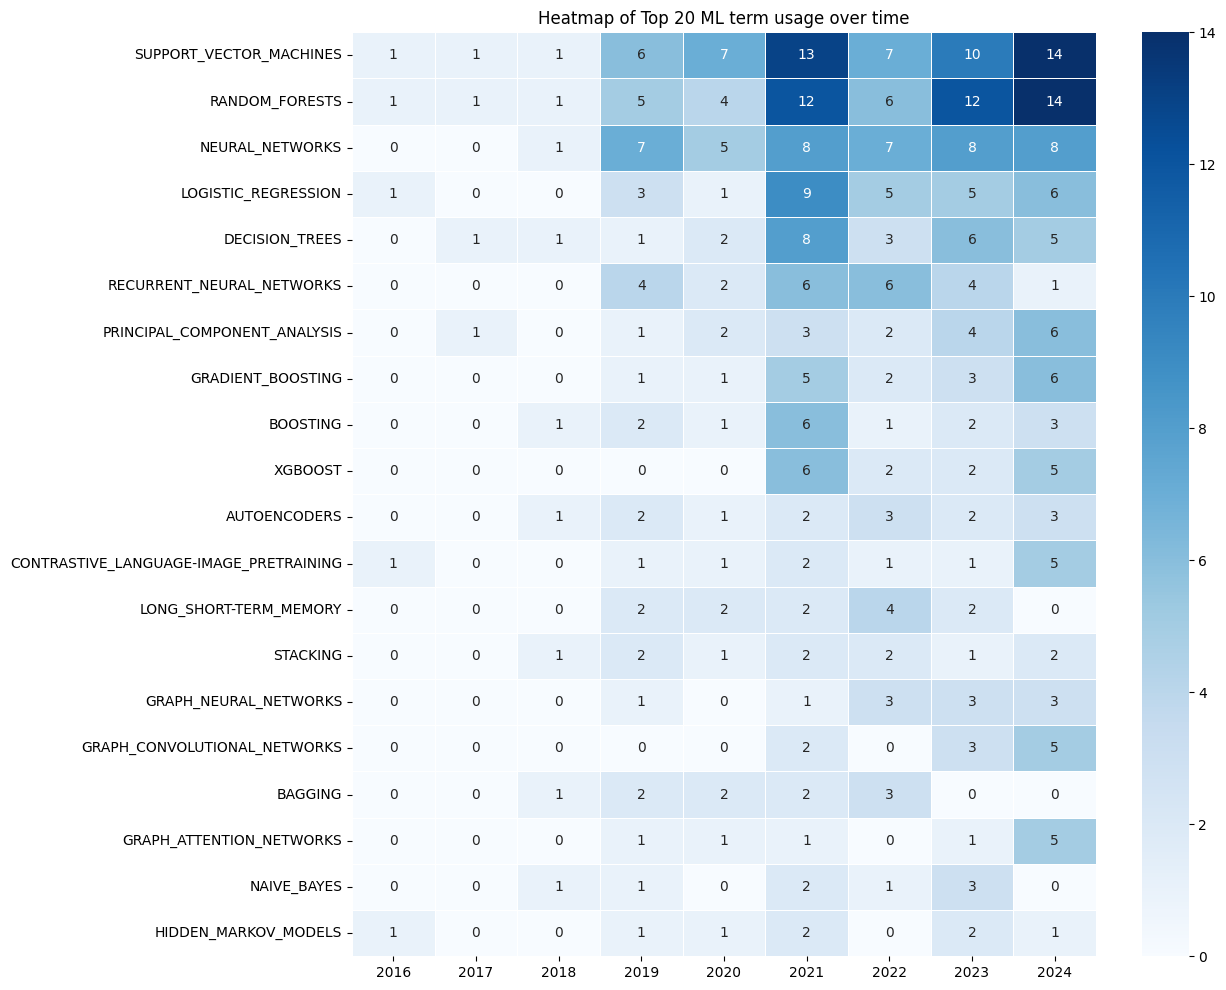

In [32]:
import seaborn as sns

# Create a heatmap for the selected ML terms
plt.figure(figsize=(12, 12))
sns.heatmap(ml_trend_pivot_20_df.T, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
#sns.heatmap(ml_trend_pivot.T, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

#plt.xlabel("Year")
plt.xlabel("")
#plt.ylabel("Machine Learning Term")
plt.ylabel("")
plt.title("Heatmap of Top 20 ML term usage over time")
plt.show()


Co-occurrence Analysis – Generate a network graph to explore relationships between ML term and research topics.

In [33]:
from collections import Counter
import numpy as np

# Group ml_terms by title
grouped_terms = ml_trend_df.groupby('title')['ml_term'].apply(list)

# Get unique ml methods
unique_terms = sorted(ml_trend_df['ml_term'].unique())

# Create an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(
    np.zeros((len(unique_terms), len(unique_terms)), dtype=int),
    index=unique_terms,
    columns=unique_terms
)

# Populate the matrix
for terms in grouped_terms:
    term_counts = Counter(terms)
    for term1 in term_counts:
        for term2 in term_counts:
            if term1 != term2:
                co_occurrence_matrix.loc[term1, term2] += 1

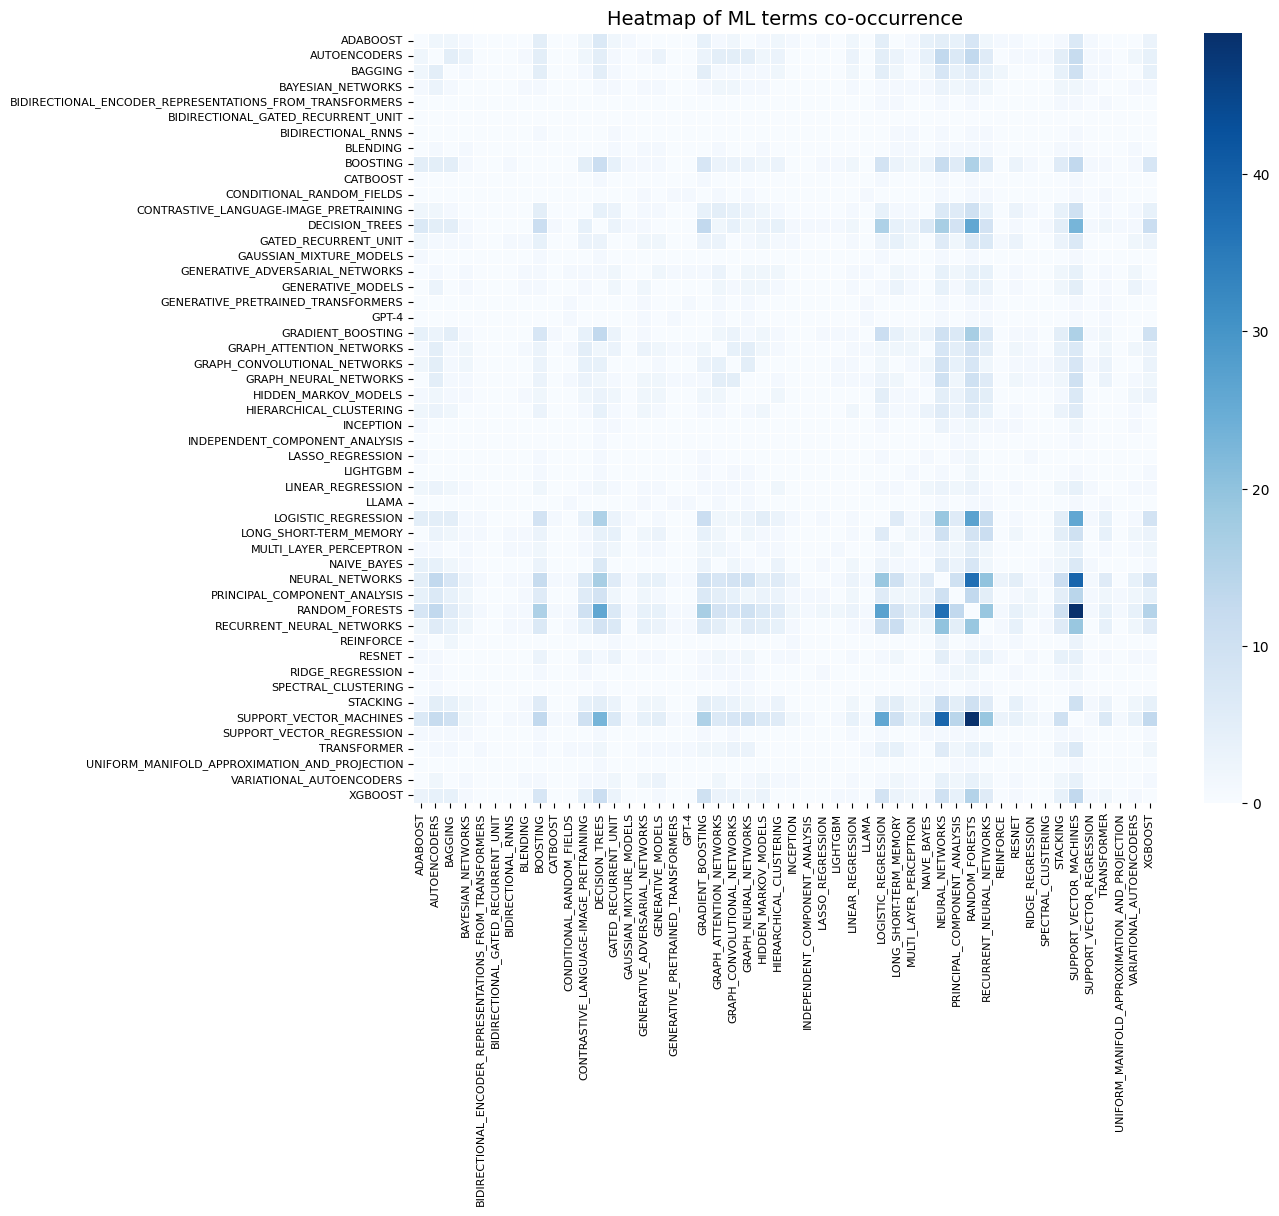

In [34]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap to visualize the co-occurrence matrix
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False, linewidths=0.5)

# Labels and title
plt.title("Heatmap of ML terms co-occurrence", fontsize=14)
#plt.xlabel("ML Methods", fontsize=12)
#plt.ylabel("ML Methods", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_co-occurrence.png", transparent=True)

# Show the plot
plt.show()


# Add hierarchy to the ML Terms by splitting them into ML Models and ML Methods

change the format of the ml_term to be in the same format as the ml_results_df

In [35]:
ml_term_classification_df['ml_term'] = ml_term_classification_df['ml_term'].apply(lambda x: x.replace(' ', '_').upper())

In [36]:
#ml_results_df.merge(ml_term_classification_df, left_on='ml_term', right_on='ml_term', how='inner')
ml_results_df = ml_results_df.merge(ml_term_classification_df, left_on='ml_term', right_on='ml_term', how='inner')

In [37]:
ml_results_df

,title,ml_term,cnt,classification,ml_model_category,ml_method_category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,ML Model,Tree-Based Model,NaN
1,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,ML Model,Tree-Based Model,NaN
2,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,ML Model,Kernel-Based Model,NaN
3,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,ML Model,Classification Model,NaN
4,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,ML Model,Tree-Based Model,NaN
...,...,...,...,...,...,...
553,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,ML Model,Tree-Based Model,NaN
554,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,ML Model,Kernel-Based Model,NaN
555,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,ML Method,NaN,Dimensionality Reduction
556,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,ML Model,Tree-Based Model,NaN


In [38]:
ml_results_df.groupby(['title', 'ml_term']).count()

cnt  \
title                                              ml_term                                       
A Machine Learning Framework for Identifying Mo... ADABOOST                                  1   
                                                   AUTOENCODERS                              1   
                                                   DECISION_TREES                            1   
                                                   HIERARCHICAL_CLUSTERING                   1   
                                                   LINEAR_REGRESSION                         1   
...                                                                                        ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS              1   
                                                   SUPPORT_VECTOR_MACHINES                   1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING    1   
                                                   RANDOM_FORESTS                            2   
                                                   SUPPORT_VECTOR_MACHINES                   1   

                                                                                           classification  \
title                                              ml_term                                                  
A Machine Learning Framework for Identifying Mo... ADABOOST                                             1   
                                                   AUTOENCODERS                                         1   
                                                   DECISION_TREES                                       1   
                                                   HIERARCHICAL_CLUSTERING                              1   
                                                   LINEAR_REGRESSION                                    1   
...                                                                                                   ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS                         1   
                                                   SUPPORT_VECTOR_MACHINES                              1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING               1   
                                                   RANDOM_FORESTS                                       2   
                                                   SUPPORT_VECTOR_MACHINES                              1   

                                                                                           ml_model_category  \
title                                              ml_term                                                     
A Machine Learning Framework for Identifying Mo... ADABOOST                                                1   
                                                   AUTOENCODERS                                            1   
                                                   DECISION_TREES                                          1   
                                                   HIERARCHICAL_CLUSTERING                                 0   
                                                   LINEAR_REGRESSION                                       1   
...                                                                                                      ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS                            0   
                                                   SUPPORT_VECTOR_MACHINES                                 1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING                  0   
                                                   RANDOM_FORESTS                                          2   
                                                   SUP

In [39]:
ml_results_df.to_csv('ml_results_df.csv', index=False)

### ML Methods

In [40]:
ml_method_results_df = ml_results_df.query('classification == "ML Method"').drop(columns=['classification', 'ml_model_category'])

In [41]:
ml_method_results_df

,title,ml_term,cnt,ml_method_category
9,DMFLDA: a deep learning framework for predicti...,BAGGING,2,Supervised Learning
19,Evaluation of deep learning in non-coding RNA ...,GENERATIVE_MODELS,1,Generative Modeling
43,SDLDA: lncRNA-disease association prediction b...,BAGGING,2,Supervised Learning
45,SDLDA: lncRNA-disease association prediction b...,REINFORCE,2,Reinforcement Learning
47,A systematic evaluation of the computational t...,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING,1,Self-Supervised Learning
...,...,...,...,...
535,Mitochondrial Import of Malat1 Regulates Cardi...,PRINCIPAL_COMPONENT_ANALYSIS,1,Dimensionality Reduction
542,Deciphering the methylation landscape in breas...,PRINCIPAL_COMPONENT_ANALYSIS,13,Dimensionality Reduction
543,Deciphering the methylation landscape in breas...,UNIFORM_MANIFOLD_APPROXIMATION_AND_PROJECTION,3,Unsupervised Learning
555,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,Dimensionality Reduction


Plot frequency analysis

In [42]:
def plot_most_mentioned(df, title, xlabel):
    plt.figure(figsize=(12, 6))
    df.head(20).plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency (Count)")
    plt.xticks(rotation=45)
    plt.show()

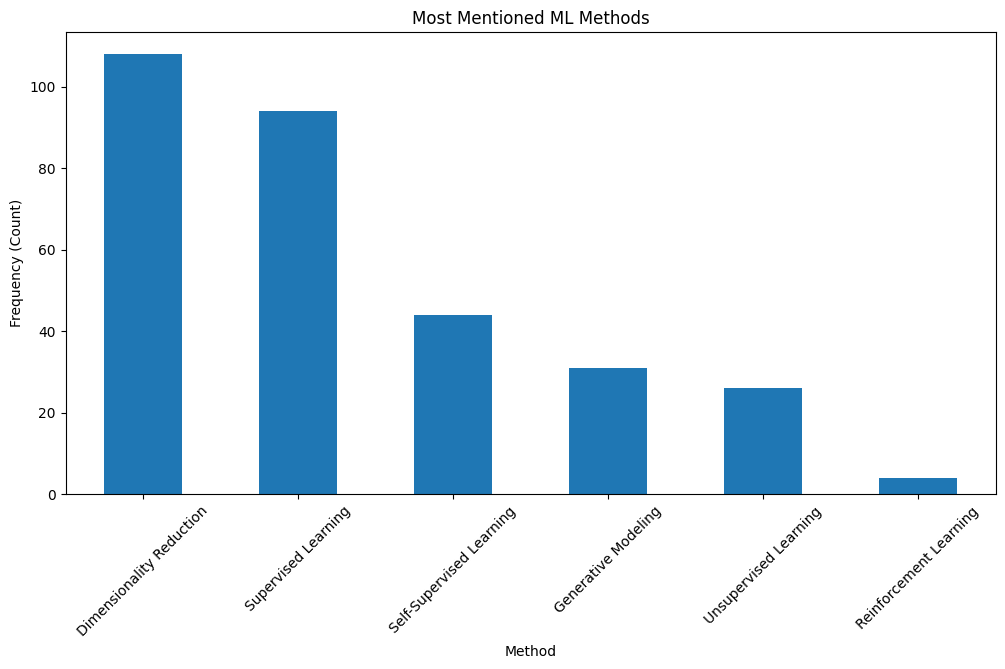

In [43]:
# Aggregate the counts of ML terms
ml_method_counts = ml_method_results_df.groupby("ml_method_category")["cnt"].sum().sort_values(ascending=False)

plot_most_mentioned(df=ml_method_counts, title='Most Mentioned ML Methods', xlabel='Method')

In [44]:
def count_distinct_titles_by_category(df, category, total_no_papers):
    # Count distinct Titles grouped by Category
    ml_category_counts_df = df.groupby(category)['title'].nunique().reset_index()
    ml_category_counts_df.columns = [category, "paper_count"]
    ml_category_counts_df.sort_values(['paper_count'], ascending=False, inplace=True)
    ml_category_counts_df['paper_pct'] = (ml_category_counts_df['paper_count'] / total_no_papers) * 100
    return ml_category_counts_df
    

In [45]:
# Count distinct Titles grouped by Category
ml_category_counts_df = count_distinct_titles_by_category(df=ml_method_results_df, category='ml_method_category', total_no_papers=total_no_papers)

In [46]:
ml_category_counts_df

,ml_method_category,paper_count,paper_pct
0,Dimensionality Reduction,19,25.000000
4,Supervised Learning,17,22.368421
3,Self-Supervised Learning,12,15.789474
5,Unsupervised Learning,10,13.157895
1,Generative Modeling,5,6.578947
2,Reinforcement Learning,3,3.947368


In [47]:
def plot_category_vs_papers(df, category, papers, title, xlabel):
    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.barh(df[category], df[papers])
    plt.xlabel(xlabel)
    # plt.ylabel("ML Term")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

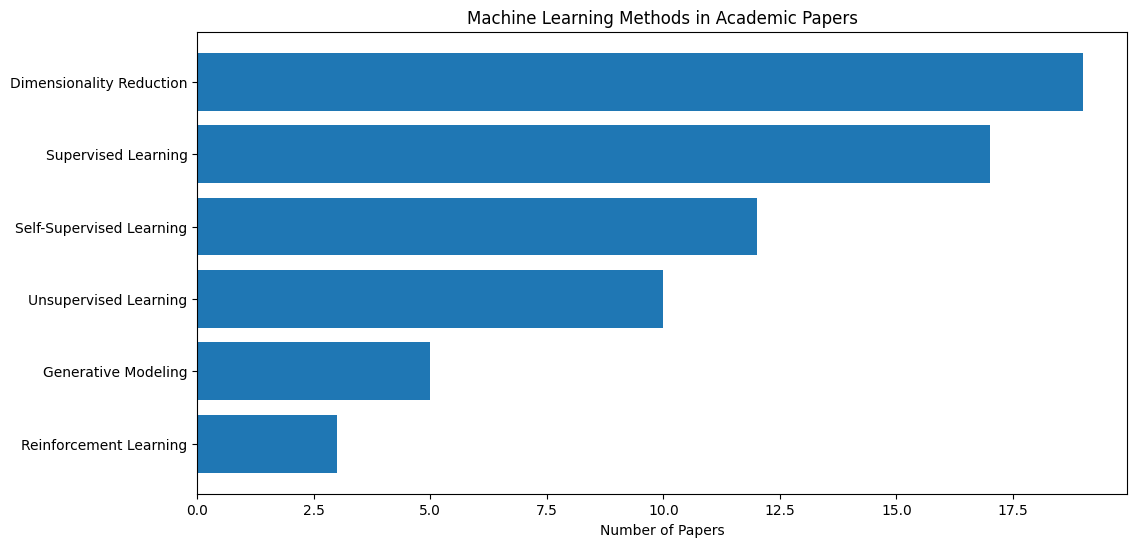

In [48]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_method_category',
                        papers='paper_count',
                        title='Machine Learning Methods in Academic Papers',
                        xlabel='Number of Papers'
                       )


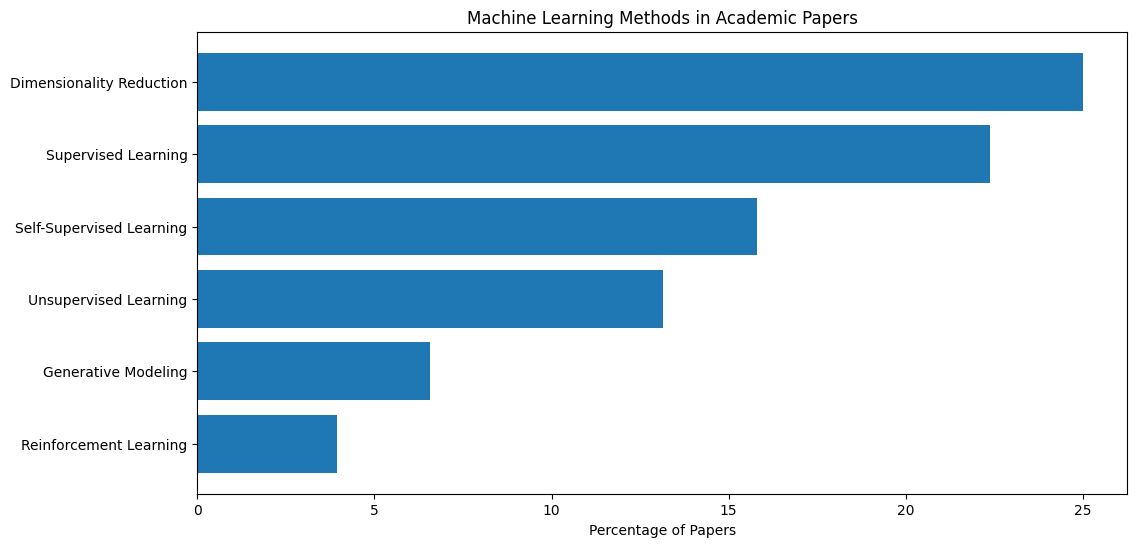

In [49]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_method_category',
                        papers='paper_pct',
                        title='Machine Learning Methods in Academic Papers',
                        xlabel='Percentage of Papers'
                       )

Trend analysis

In [50]:
# Merge ML results with publication years
ml_trend_df = ml_method_results_df.merge(meta_df, on="title")

# Aggregate counts per year
ml_trend_over_time = ml_trend_df.groupby(["year", "ml_method_category"])["cnt"].sum().reset_index()

# Pivot for visualization
ml_trend_pivot_df = ml_trend_over_time.pivot(index="year", columns="ml_method_category", values="cnt").fillna(0)

In [51]:
ml_trend_pivot_df

ml_method_category,Dimensionality Reduction,Generative Modeling,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
year,,,,,,
2016,0.0,0.0,0.0,3.0,0.0,0.0
2017,1.0,0.0,0.0,0.0,0.0,1.0
2018,0.0,0.0,0.0,0.0,16.0,1.0
2019,12.0,5.0,1.0,2.0,49.0,12.0
2020,2.0,24.0,2.0,24.0,6.0,0.0
2021,19.0,0.0,0.0,6.0,10.0,7.0
2022,10.0,0.0,0.0,2.0,5.0,3.0
2023,31.0,2.0,1.0,1.0,1.0,2.0
2024,33.0,0.0,0.0,6.0,7.0,0.0


In [52]:
# Calculate total value for each ML Category
column_totals = ml_trend_pivot_df.iloc[:, :].sum().sort_values(ascending=False)

# Reorder columns based on the total value
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [53]:
column_totals

ml_method_category
Dimensionality Reduction    108.0
Supervised Learning          94.0
Self-Supervised Learning     44.0
Generative Modeling          31.0
Unsupervised Learning        26.0
Reinforcement Learning        4.0
dtype: float64

In [54]:
ml_trend_pivot_df

ml_method_category,Dimensionality Reduction,Supervised Learning,Self-Supervised Learning,Generative Modeling,Unsupervised Learning,Reinforcement Learning
year,,,,,,
2016,0.0,0.0,3.0,0.0,0.0,0.0
2017,1.0,0.0,0.0,0.0,1.0,0.0
2018,0.0,16.0,0.0,0.0,1.0,0.0
2019,12.0,49.0,2.0,5.0,12.0,1.0
2020,2.0,6.0,24.0,24.0,0.0,2.0
2021,19.0,10.0,6.0,0.0,7.0,0.0
2022,10.0,5.0,2.0,0.0,3.0,0.0
2023,31.0,1.0,1.0,2.0,2.0,1.0
2024,33.0,7.0,6.0,0.0,0.0,0.0


In [55]:
def plot_category_over_time(df, title, legend_title, file_name):
    # Define colormap using the correct method
    num_categories = len(ml_trend_pivot_df.columns)
    colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
    colors = [colormap(i / num_categories) for i in range(num_categories)]  # Generate distinct colors
    
    # Plot time-series trends with improved colors
    plt.figure(figsize=(12, 6))
    ax = ml_trend_pivot_df.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Frequency (Count)')
    # Make the legend transparent, adjust alpha between 0 (fully transparent) and 1 (opaque)
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.0)
    plt.grid(True)    

    # Saving the figure.
    plt.savefig(f'{IMAGE_FOLDER}{file_name}', transparent=True, dpi=300, bbox_inches='tight')
    
    plt.show()

<Figure size 1200x600 with 0 Axes>

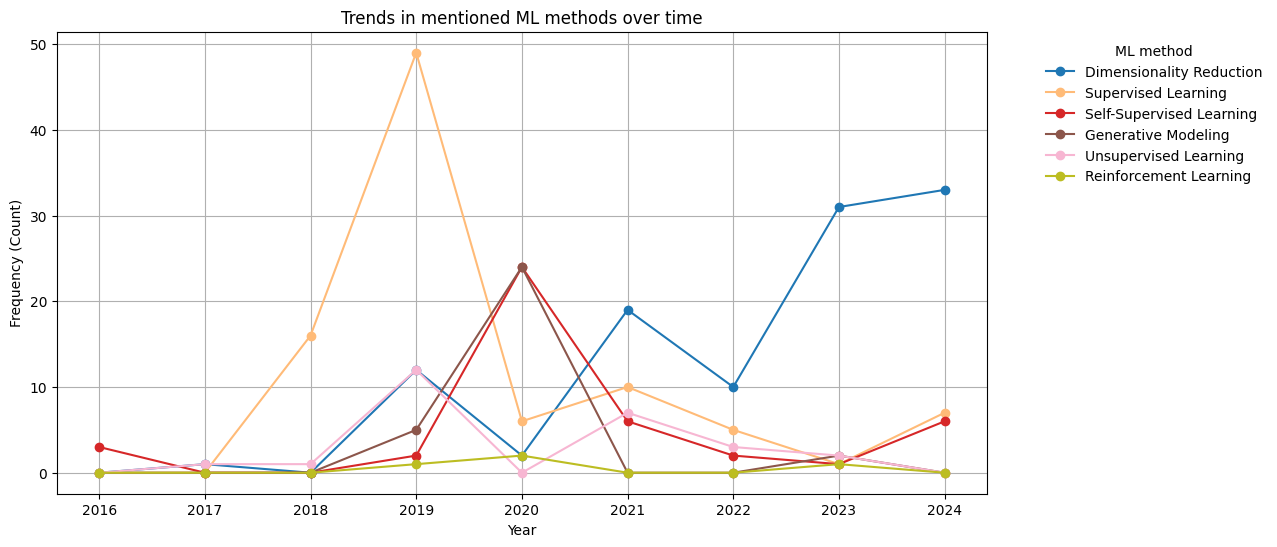

In [56]:
plot_category_over_time(df=ml_trend_pivot_df,
                        title='Trends in mentioned ML methods over time',
                        legend_title='ML method',
                        file_name='top_20_ml_method_trend.png'
                       )

Co-occurrence Analysis – Generate a network graph to explore relationships between ML Methods and research topics.

In [57]:
def generate_co_occurrence_matrix(df, category):
    # Group categories by title
    grouped_categories = df.groupby('title')[category].apply(list)
    
    # Get unique categories
    unique_categories = sorted(df[category].unique())
    
    # Create an empty co-occurrence matrix
    co_occurrence_matrix_category = pd.DataFrame(
        np.zeros((len(unique_categories), len(unique_categories)), dtype=int),
        index=unique_categories,
        columns=unique_categories
    )
    
    # Populate the matrix
    for categories in grouped_categories:
        category_counts = Counter(categories)
        for cat1 in category_counts:
            for cat2 in category_counts:
                if cat1 != cat2:
                    co_occurrence_matrix_category.loc[cat1, cat2] += 1
    return co_occurrence_matrix_category, unique_categories

In [58]:
def plot_co_occurrence_matrix(matrix, title):
    # Set up the figure
    plt.figure(figsize=(12, 10))
    
    # Use seaborn's heatmap to visualize the co-occurrence matrix
    sns.heatmap(matrix, cmap="Blues", annot=False, linewidths=0.5)
    
    # Labels and title
    plt.title(title, fontsize=14)
    #plt.xlabel("ML Categories", fontsize=12)
    #plt.ylabel("ML Categories", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    
    # Show the plot
    plt.show()

In [59]:
co_occurrence_matrix_category, unique_categories = generate_co_occurrence_matrix(df=ml_trend_df, category='ml_method_category')

In [60]:
co_occurrence_matrix_category

,Dimensionality Reduction,Generative Modeling,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
Dimensionality Reduction,0,1,0,6,7,5
Generative Modeling,1,0,0,1,2,1
Reinforcement Learning,0,0,0,0,2,0
Self-Supervised Learning,6,1,0,0,5,1
Supervised Learning,7,2,2,5,0,3
Unsupervised Learning,5,1,0,1,3,0


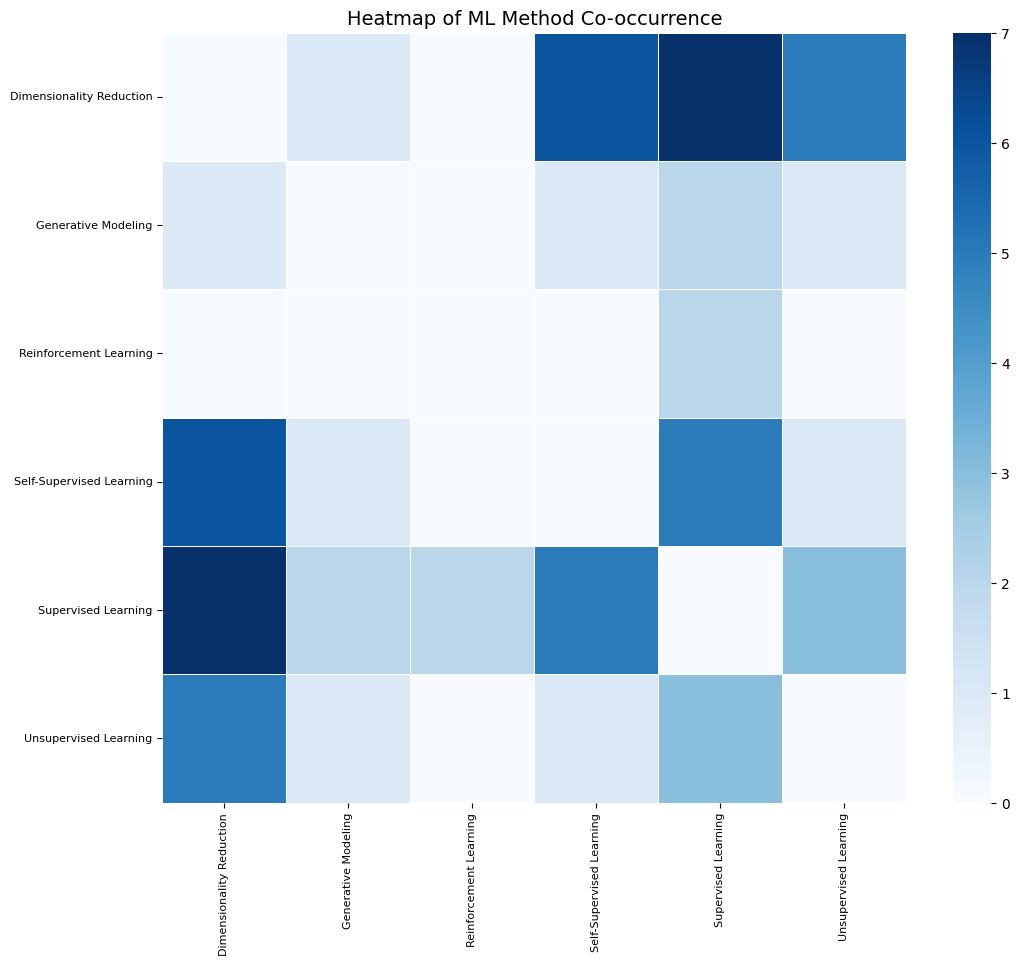

In [61]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_category, title='Heatmap of ML Method Co-occurrence')

Perform GAP analysis on this data

In [62]:
# Identify low co-occurrence category pairs (potential gaps)
low_threshold = 2  # Define threshold for underexplored category pairs
underexplored_category_pairs = np.where(
    (co_occurrence_matrix_category > 0) & (co_occurrence_matrix_category <= low_threshold)
)

# Create a DataFrame with underexplored category pairs
underexplored_category_df = pd.DataFrame({
    "Category 1": [unique_categories[i] for i in underexplored_category_pairs[0]],
    "Category 2": [unique_categories[j] for j in underexplored_category_pairs[1]],
    "Co-occurrence Frequency": [co_occurrence_matrix_category.iloc[i, j] for i, j in zip(underexplored_category_pairs[0], underexplored_category_pairs[1])]
})

# Display the underexplored co-occurrences
# tools.display_dataframe_to_user(name="Underexplored ML Category Pairs", dataframe=underexplored_category_df)
underexplored_category_df

,Category 1,Category 2,Co-occurrence Frequency
0,Dimensionality Reduction,Generative Modeling,1
1,Generative Modeling,Dimensionality Reduction,1
2,Generative Modeling,Self-Supervised Learning,1
3,Generative Modeling,Supervised Learning,2
4,Generative Modeling,Unsupervised Learning,1
5,Reinforcement Learning,Supervised Learning,2
6,Self-Supervised Learning,Generative Modeling,1
7,Self-Supervised Learning,Unsupervised Learning,1
8,Supervised Learning,Generative Modeling,2
9,Supervised Learning,Reinforcement Learning,2


Identified underexplored category pairs in ML research, where different categories have co-occurred only once or twice in the dataset. These might represent niche or less commonly explored combinations, offering potential research opportunities.

### ML Models

In [63]:
ml_model_results_df = ml_results_df.query('classification == "ML Model"').drop(columns=['classification', 'ml_method_category'])

In [64]:
ml_model_results_df

,title,ml_term,cnt,ml_model_category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,Tree-Based Model
1,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,Tree-Based Model
2,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,Kernel-Based Model
3,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,Classification Model
4,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,Tree-Based Model
...,...,...,...,...
551,Machine learning models for predicting lymph n...,NEURAL_NETWORKS,2,Neural Network
552,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,Tree-Based Model
553,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,Tree-Based Model
554,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,Kernel-Based Model


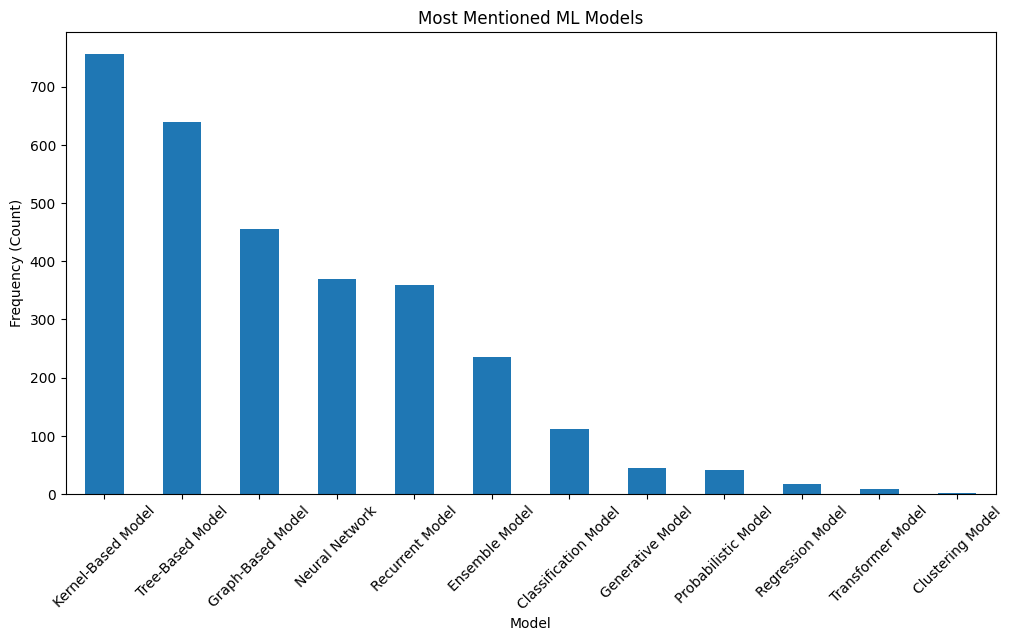

In [65]:
# Aggregate the counts of ML terms
ml_model_counts = ml_model_results_df.groupby('ml_model_category')['cnt'].sum().sort_values(ascending=False)

plot_most_mentioned(df=ml_model_counts, title='Most Mentioned ML Models', xlabel='Model')

In [66]:
# Count distinct Titles grouped by Category
ml_category_counts_df = count_distinct_titles_by_category(df=ml_model_results_df, category='ml_model_category', total_no_papers=total_no_papers)

In [67]:
ml_category_counts_df

,ml_model_category,paper_count,paper_pct
5,Kernel-Based Model,60,78.947368
11,Tree-Based Model,57,75.000000
6,Neural Network,49,64.473684
2,Ensemble Model,33,43.421053
0,Classification Model,30,39.473684
8,Recurrent Model,25,32.894737
7,Probabilistic Model,18,23.684211
4,Graph-Based Model,18,23.684211
9,Regression Model,8,10.526316
3,Generative Model,7,9.210526


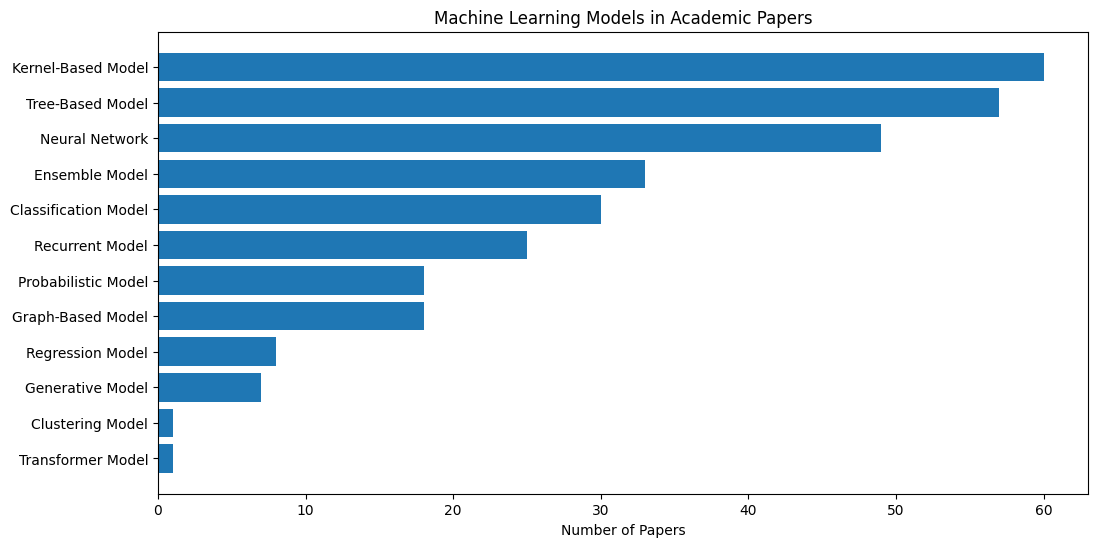

In [68]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_model_category',
                        papers='paper_count',
                        title='Machine Learning Models in Academic Papers',
                        xlabel='Number of Papers'
                       )

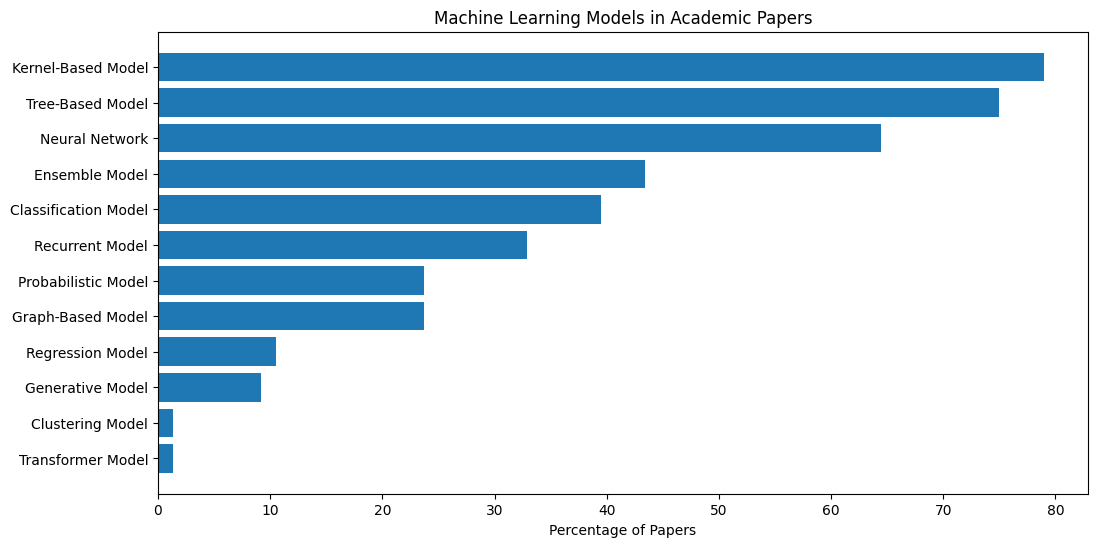

In [69]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_model_category',
                        papers='paper_pct',
                        title='Machine Learning Models in Academic Papers',
                        xlabel='Percentage of Papers'
                       )

Trend analysis

In [70]:
# Merge ML results with publication years
ml_trend_df = ml_model_results_df.merge(meta_df, on="title")

# Aggregate counts per year
ml_trend_over_time = ml_trend_df.groupby(["year", "ml_model_category"])["cnt"].sum().reset_index()

# Pivot for visualization
ml_trend_pivot_df = ml_trend_over_time.pivot(index="year", columns="ml_model_category", values="cnt").fillna(0)

In [71]:
ml_trend_pivot_df

ml_model_category,Classification Model,Clustering Model,Ensemble Model,Generative Model,Graph-Based Model,Kernel-Based Model,Neural Network,Probabilistic Model,Recurrent Model,Regression Model,Transformer Model,Tree-Based Model
year,,,,,,,,,,,,
2016,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
2017,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,33.0
2018,0.0,0.0,2.0,0.0,0.0,42.0,12.0,1.0,0.0,0.0,0.0,59.0
2019,21.0,0.0,36.0,9.0,7.0,65.0,35.0,3.0,104.0,1.0,0.0,104.0
2020,3.0,0.0,15.0,30.0,9.0,31.0,59.0,7.0,83.0,0.0,0.0,25.0
2021,17.0,1.0,82.0,0.0,328.0,199.0,88.0,14.0,56.0,5.0,0.0,145.0
2022,7.0,0.0,25.0,0.0,23.0,181.0,52.0,3.0,50.0,5.0,0.0,74.0
2023,51.0,0.0,30.0,3.0,34.0,77.0,73.0,9.0,65.0,2.0,0.0,106.0
2024,11.0,0.0,46.0,3.0,54.0,97.0,51.0,3.0,2.0,5.0,8.0,92.0


In [72]:
# Calculate total value for each ML Category
column_totals = ml_trend_pivot_df.iloc[:, :].sum().sort_values(ascending=False)

# Reorder columns based on the total value
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [73]:
column_totals

ml_model_category
Kernel-Based Model      756.0
Tree-Based Model        640.0
Graph-Based Model       455.0
Neural Network          370.0
Recurrent Model         360.0
Ensemble Model          236.0
Classification Model    111.0
Generative Model         45.0
Probabilistic Model      41.0
Regression Model         18.0
Transformer Model         8.0
Clustering Model          1.0
dtype: float64

In [74]:
ml_trend_pivot_df

ml_model_category,Kernel-Based Model,Tree-Based Model,Graph-Based Model,Neural Network,Recurrent Model,Ensemble Model,Classification Model,Generative Model,Probabilistic Model,Regression Model,Transformer Model,Clustering Model
year,,,,,,,,,,,,
2016,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2017,62.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,42.0,59.0,0.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
2019,65.0,104.0,7.0,35.0,104.0,36.0,21.0,9.0,3.0,1.0,0.0,0.0
2020,31.0,25.0,9.0,59.0,83.0,15.0,3.0,30.0,7.0,0.0,0.0,0.0
2021,199.0,145.0,328.0,88.0,56.0,82.0,17.0,0.0,14.0,5.0,0.0,1.0
2022,181.0,74.0,23.0,52.0,50.0,25.0,7.0,0.0,3.0,5.0,0.0,0.0
2023,77.0,106.0,34.0,73.0,65.0,30.0,51.0,3.0,9.0,2.0,0.0,0.0
2024,97.0,92.0,54.0,51.0,2.0,46.0,11.0,3.0,3.0,5.0,8.0,0.0


<Figure size 1200x600 with 0 Axes>

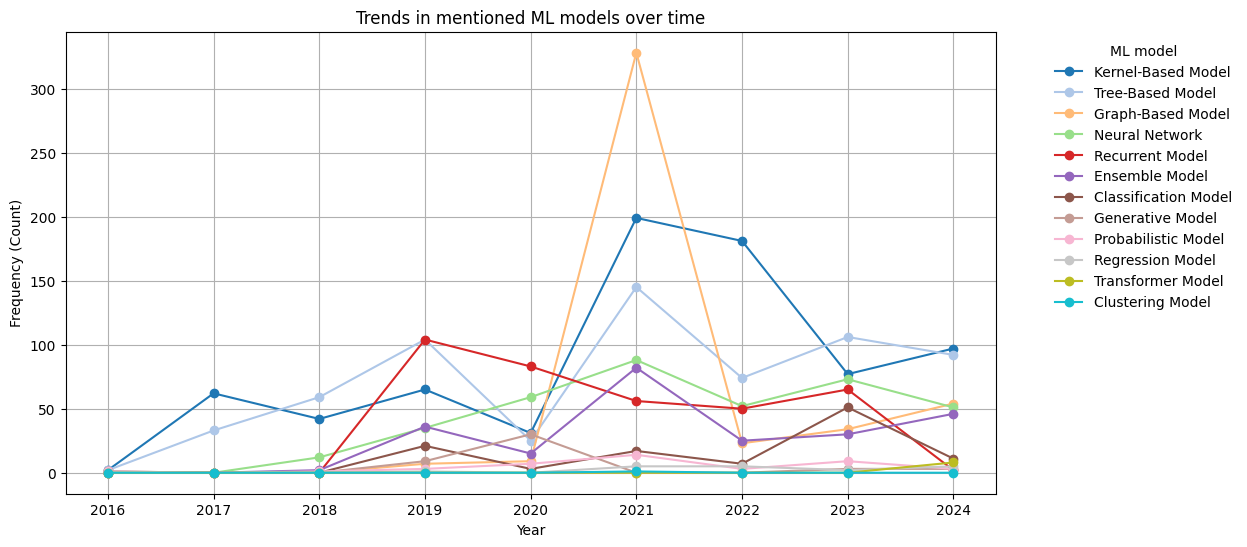

In [75]:
plot_category_over_time(df=ml_trend_pivot_df,
                        title='Trends in mentioned ML models over time',
                        legend_title='ML model',
                        file_name='top_20_ml_model_trend.png'
                       )

Co-occurrence Analysis – Generate a network graph to explore relationships between ML Models and research topics.

In [76]:
co_occurrence_matrix_category, unique_categories = generate_co_occurrence_matrix(df=ml_trend_df, category='ml_model_category')

In [77]:
co_occurrence_matrix_category

,Classification Model,Clustering Model,Ensemble Model,Generative Model,Graph-Based Model,Kernel-Based Model,Neural Network,Probabilistic Model,Recurrent Model,Regression Model,Transformer Model,Tree-Based Model
Classification Model,0,1,16,1,6,26,21,8,13,2,0,27
Clustering Model,1,0,1,0,0,1,1,0,0,0,0,1
Ensemble Model,16,1,0,3,9,30,24,10,11,6,0,32
Generative Model,1,0,3,0,3,6,6,4,4,1,1,6
Graph-Based Model,6,0,9,3,0,16,17,6,8,3,1,16
Kernel-Based Model,26,1,30,6,16,0,43,15,20,6,1,49
Neural Network,21,1,24,6,17,43,0,14,22,5,1,39
Probabilistic Model,8,0,10,4,6,15,14,0,9,3,1,17
Recurrent Model,13,0,11,4,8,20,22,9,0,1,1,20
Regression Model,2,0,6,1,3,6,5,3,1,0,0,6


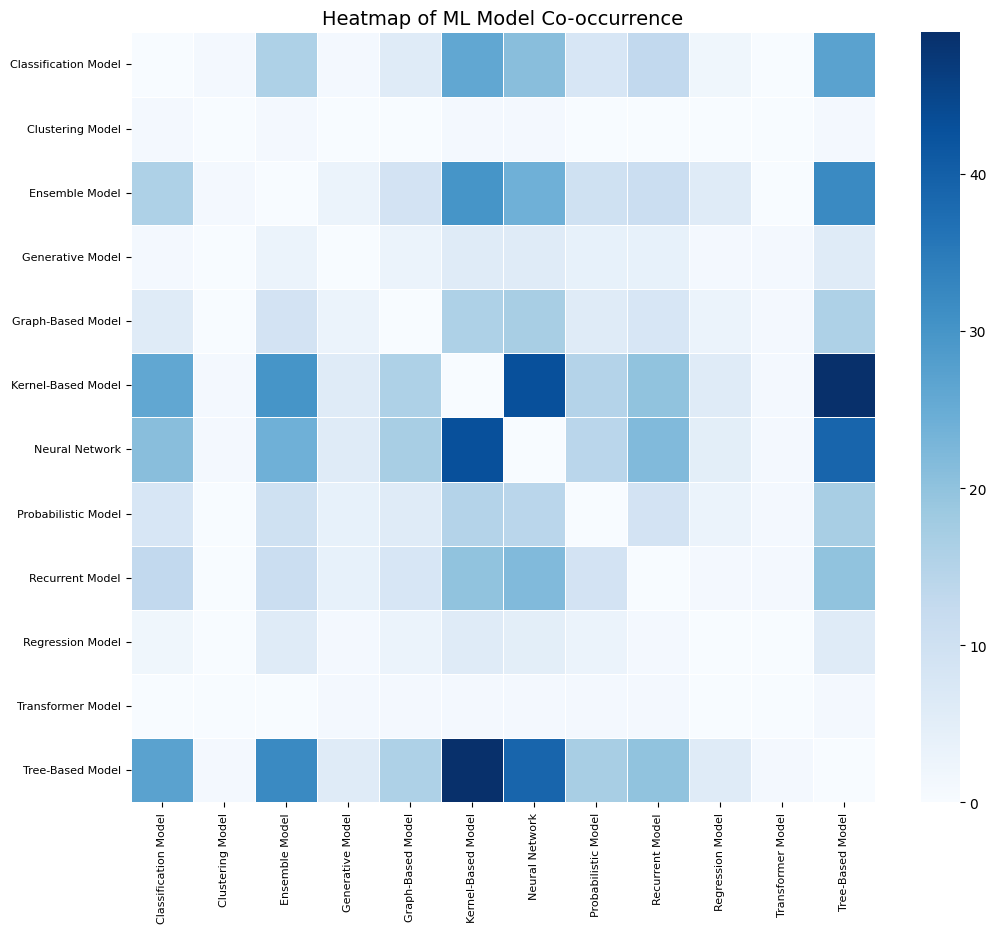

In [78]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_category, title='Heatmap of ML Model Co-occurrence')

Perform GAP analysis on this data

In [79]:
# Identify low co-occurrence category pairs (potential gaps)
low_threshold = 2  # Define threshold for underexplored category pairs
underexplored_category_pairs = np.where(
    (co_occurrence_matrix_category > 0) & (co_occurrence_matrix_category <= low_threshold)
)

# Create a DataFrame with underexplored category pairs
underexplored_category_df = pd.DataFrame({
    "Category 1": [unique_categories[i] for i in underexplored_category_pairs[0]],
    "Category 2": [unique_categories[j] for j in underexplored_category_pairs[1]],
    "Co-occurrence Frequency": [co_occurrence_matrix_category.iloc[i, j] for i, j in zip(underexplored_category_pairs[0], underexplored_category_pairs[1])]
})

# Display the underexplored co-occurrences
# tools.display_dataframe_to_user(name="Underexplored ML Category Pairs", dataframe=underexplored_category_df)
underexplored_category_df

,Category 1,Category 2,Co-occurrence Frequency
0,Classification Model,Clustering Model,1
1,Classification Model,Generative Model,1
2,Classification Model,Regression Model,2
3,Clustering Model,Classification Model,1
4,Clustering Model,Ensemble Model,1
5,Clustering Model,Kernel-Based Model,1
6,Clustering Model,Neural Network,1
7,Clustering Model,Tree-Based Model,1
8,Ensemble Model,Clustering Model,1
9,Generative Model,Classification Model,1


Identified underexplored category pairs in ML research, where different categories have co-occurred only once or twice in the dataset. These might represent niche or less commonly explored combinations, offering potential research opportunities.

### Method & Model

In [80]:
df_filtered = ml_results_df.drop(columns=['cnt', 'classification', 'ml_term'])

In [81]:
# Create paper_model_df with distinct values of title and ml_model_category
paper_model_df = df_filtered[['title', 'ml_model_category']].drop_duplicates()

# Create paper_method_df with distinct values of title and ml_method_category
paper_method_df = df_filtered[['title', 'ml_method_category']].drop_duplicates()

# Display the new dataframes
#tools.display_dataframe_to_user(name="Paper Model DataFrame", dataframe=paper_model_df)
#tools.display_dataframe_to_user(name="Paper Method DataFrame", dataframe=paper_method_df)


In [82]:
# Drop rows with null values in paper_model_df and paper_method_df
paper_model_df = paper_model_df.dropna(subset=['ml_model_category'])
paper_method_df = paper_method_df.dropna(subset=['ml_method_category'])

# Display the cleaned dataframes
#tools.display_dataframe_to_user(name="Cleaned Paper Model DataFrame", dataframe=paper_model_df)
#tools.display_dataframe_to_user(name="Cleaned Paper Method DataFrame", dataframe=paper_method_df)


In [83]:
# Merge the two dataframes on 'title' to associate models with methods in the same paper
merged_df = paper_model_df.merge(paper_method_df, on='title')

# Create a co-occurrence matrix using a cross-tabulation
co_occurrence_matrix_model_method = pd.crosstab(merged_df['ml_model_category'], merged_df['ml_method_category'])

# Display the co-occurrence matrix
#tools.display_dataframe_to_user(name="Co-Occurrence Matrix", dataframe=co_occurrence_matrix)

# Create a co-occurrence matrix with methods as rows and models as columns
co_occurrence_matrix_method_model = pd.crosstab(merged_df['ml_method_category'], merged_df['ml_model_category'])

# Display the co-occurrence matrix
#tools.display_dataframe_to_user(name="Co-Occurrence Matrix (Method-Model)", dataframe=co_occurrence_matrix_method_model)


In [84]:
co_occurrence_matrix_model_method

ml_method_category,Dimensionality Reduction,Generative Modeling,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
ml_model_category,,,,,,
Classification Model,6,1,0,4,7,3
Ensemble Model,9,2,1,6,10,5
Generative Model,3,3,0,1,2,2
Graph-Based Model,7,3,0,7,7,2
Kernel-Based Model,14,5,3,10,16,9
Neural Network,10,5,3,7,16,8
Probabilistic Model,6,2,0,2,4,6
Recurrent Model,5,3,1,4,9,5
Regression Model,5,1,0,2,4,2


In [85]:
co_occurrence_matrix_method_model

ml_model_category,Classification Model,Ensemble Model,Generative Model,Graph-Based Model,Kernel-Based Model,Neural Network,Probabilistic Model,Recurrent Model,Regression Model,Tree-Based Model
ml_method_category,,,,,,,,,,
Dimensionality Reduction,6,9,3,7,14,10,6,5,5,13
Generative Modeling,1,2,3,3,5,5,2,3,1,4
Reinforcement Learning,0,1,0,0,3,3,0,1,0,1
Self-Supervised Learning,4,6,1,7,10,7,2,4,2,10
Supervised Learning,7,10,2,7,16,16,4,9,4,12
Unsupervised Learning,3,5,2,2,9,8,6,5,2,9


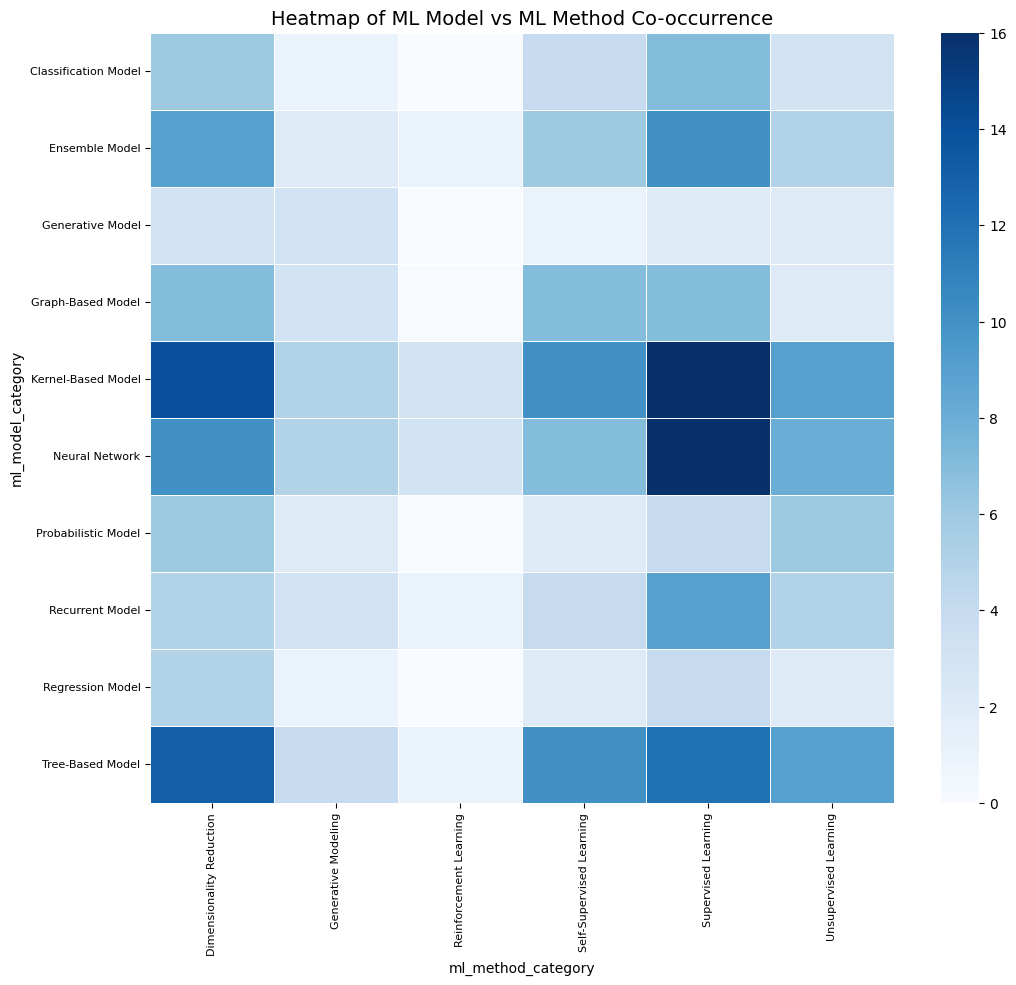

In [86]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_model_method, title='Heatmap of ML Model vs ML Method Co-occurrence')

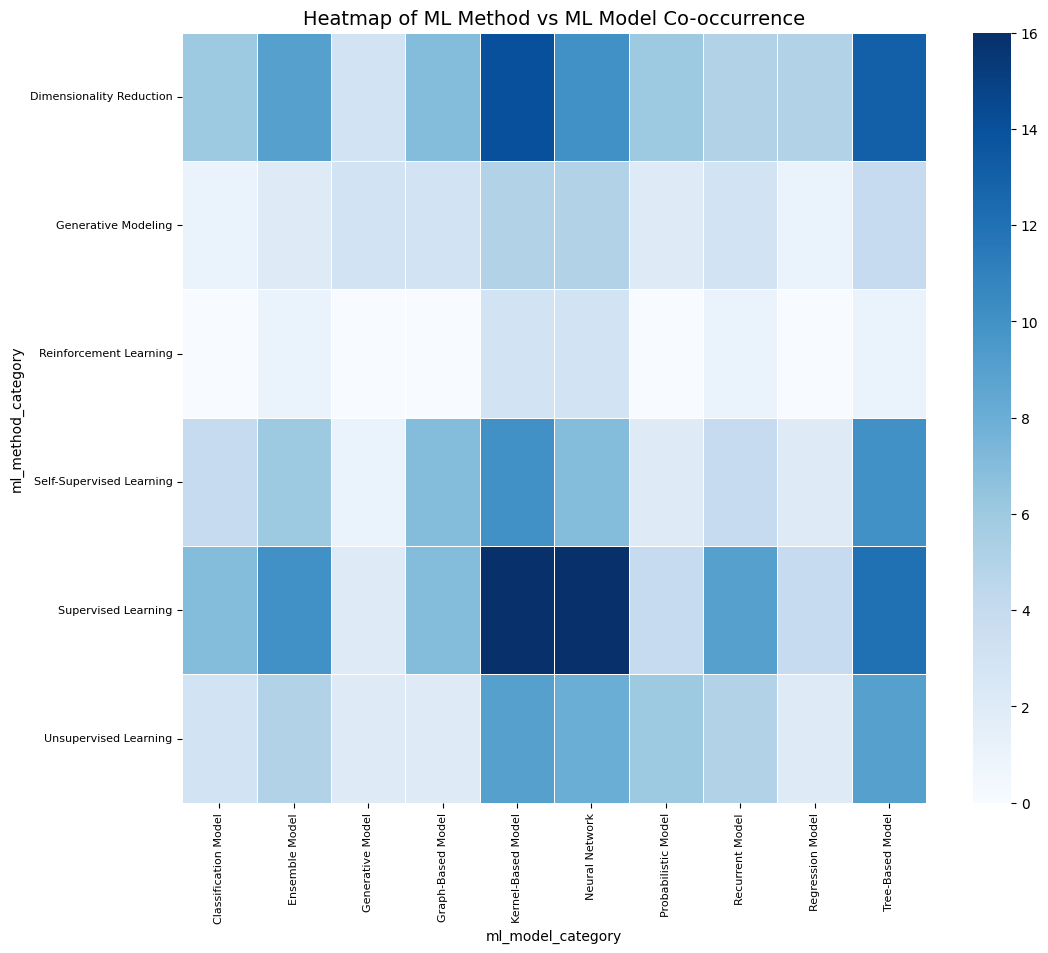

In [87]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_method_model, title='Heatmap of ML Method vs ML Model Co-occurrence')

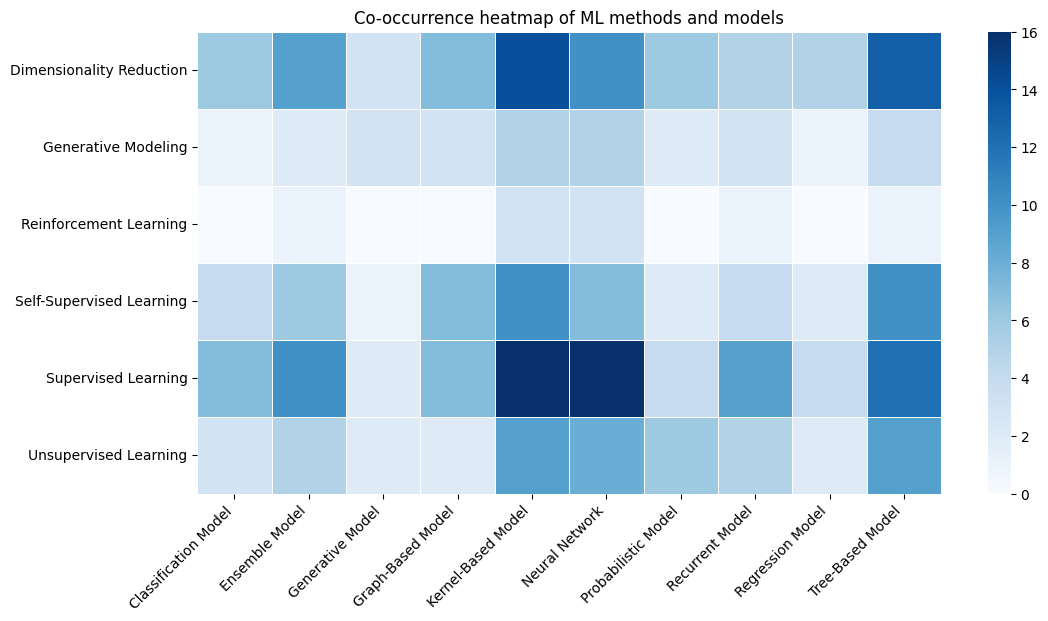

In [96]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the heatmap with rotated x-axis labels
sns.heatmap(co_occurrence_matrix_method_model, annot=False, cmap='Blues', fmt='d', linewidths=.5)

# Set labels and title
#plt.xlabel("Model")
#plt.ylabel("Method")
plt.xlabel('')
plt.ylabel('')
plt.title('Co-occurrence heatmap of ML methods and models')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=45, ha='right', fontsize=10)

#plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)

# Saving the figure.
plt.savefig(f'{IMAGE_FOLDER}co-occurrence_heatmap_ml_methods_and_models.png', transparent=True, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [89]:
# Identify low-occurrence areas in the co-occurrence matrix
threshold = co_occurrence_matrix_method_model.mean().mean()  # Define a threshold based on the average count
low_occurrence = co_occurrence_matrix_method_model < threshold  # Boolean mask for low occurrences

# Extract low-occurrence pairs
gap_analysis_df = co_occurrence_matrix_method_model[low_occurrence]

In [90]:
gap_analysis_df

ml_model_category,Classification Model,Ensemble Model,Generative Model,Graph-Based Model,Kernel-Based Model,Neural Network,Probabilistic Model,Recurrent Model,Regression Model,Tree-Based Model
ml_method_category,,,,,,,,,,
Dimensionality Reduction,NaN,NaN,3,NaN,NaN,NaN,NaN,5.0,5,NaN
Generative Modeling,1.0,2.0,3,3.0,5.0,5.0,2.0,3.0,1,4.0
Reinforcement Learning,0.0,1.0,0,0.0,3.0,3.0,0.0,1.0,0,1.0
Self-Supervised Learning,4.0,NaN,1,NaN,NaN,NaN,2.0,4.0,2,NaN
Supervised Learning,NaN,NaN,2,NaN,NaN,NaN,4.0,NaN,4,NaN
Unsupervised Learning,3.0,5.0,2,2.0,NaN,NaN,NaN,5.0,2,NaN
